BISM3206 Machine Learning Project


> **Note:**  
> The entire code takes just under six minutes to run on my computer.
> Before running the code, please install the following libraries using `pip install` or another method appropriate for your system:
>
> - pandas
> - numpy
> - matplotlib
> - nltk
> - scikit-learn (`sklearn`)
> - textblob
> - textstat


Part 1: Introduction

In this part, I will load the dataset, explore it, and prepare it for machine learning models. I will begin by examining the dataset, then perform numerical data exploration and preparation. This will be followed by data visualisation to gain a better understanding of the processed dataset. After that, I will carry out text preparation and feature generation. I will start with methods introduced in the lectures and then apply additional feature generation techniques discovered through external research.


1.1 Numerical Data Explaration and Preparation


In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data and explore it
df = pd.read_excel("Assignment_Data.xlsx")
df.head()

,property_address,property_suburb,property_state,listing_description,listed_date,listed_price,days_on_market,number_of_beds,number_of_baths,number_of_parks,property_size,property_classification,property_sub_classification,suburb_days_on_market,suburb_median_price,price_outcome
0,"10/15 Childs Street, CLAYFIELD QLD 4011",CLAYFIELD,QLD,Living Among the Tree Tops! Enjoy the cooling ...,2022-03-24,475000,6,2,2.0,1.0,NaN,Unit,Apartment / Unit / Flat,NaN,NaN,Higher
1,"7 Oudeman Street, AUGUSTINE HEIGHTS QLD 4300",AUGUSTINE HEIGHTS,QLD,Poised To Impress This immaculate residence wi...,2022-06-16,899000,47,4,2.0,2.0,740.0,House,House,NaN,NaN,Lower
2,"37 Starling Street, DEEBING HEIGHTS QLD 4306",DEEBING HEIGHTS,QLD,Affordable & Stylish This welcoming 4 Bedroom ...,2022-10-13,579000,25,4,2.0,2.0,398.0,House,House,NaN,NaN,Higher
3,"32 Horizon Drive, JAMBOREE HEIGHTS QLD 4074",JAMBOREE HEIGHTS,QLD,FULLY RENOVATED LOW SET FAMILY HOME This stunn...,2022-07-31,800000,36,4,2.0,1.0,607.0,House,House,NaN,NaN,Higher
4,"90 Lunga Street, CARINA QLD 4152",CARINA,QLD,Renovated family home on 607sqm in leafy sough...,2022-10-13,889000,20,3,1.0,1.0,607.0,House,House,28.0,913000.0,Lower


In [3]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nDuplicate rows:", df.duplicated().sum())
print("\nNull values:\n", df.isna().sum())
print("\nClass distribution (before filtering):\n", df['price_outcome'].value_counts())


Dataset shape: (6957, 16)

Data types:
 property_address                       object
property_suburb                        object
property_state                         object
listing_description                    object
listed_date                    datetime64[ns]
listed_price                            int64
days_on_market                          int64
number_of_beds                          int64
number_of_baths                       float64
number_of_parks                       float64
property_size                         float64
property_classification                object
property_sub_classification            object
suburb_days_on_market                 float64
suburb_median_price                   float64
price_outcome                          object
dtype: object

Duplicate rows: 1389

Null values:
 property_address                  0
property_suburb                   0
property_state                    0
listing_description               0
listed_date                  

In [4]:
# Filter out 'Equal' class because we only want "Higher" and "Lower"
df1 = df.copy()
df1 = df1[df1['price_outcome'] != 'Equal']
# Map target to numerical values
df1['price_outcome'] = df1['price_outcome'].map({'Higher': 1, 'Lower': 0})


In [5]:
#Removing duplicate rows
df2 = df1.copy()
df2 = df2.drop_duplicates().reset_index(drop=True)

print(df2.isna().sum())

property_address                  0
property_suburb                   0
property_state                    0
listing_description               0
listed_date                       0
listed_price                      0
days_on_market                    0
number_of_beds                    0
number_of_baths                 148
number_of_parks                 167
property_size                  1336
property_classification           0
property_sub_classification       0
suburb_days_on_market          4324
suburb_median_price            4218
price_outcome                     0
dtype: int64


In [6]:
# Fill Null values for property size, number of baths and number of parks with median
df2['property_size'].fillna(df2['property_size'].median(), inplace=True)
df2['number_of_baths'].fillna(df2['number_of_baths'].median(), inplace=True)
df2['number_of_parks'].fillna(df2['number_of_parks'].median(), inplace=True)

# Drop suburb days on market and median price for now due to about 80% missing data
# Create missingness flag first
df2['suburb_data_missing'] = df2['suburb_median_price'].isna().astype(int)
df2 = df2.drop(columns=['suburb_days_on_market', 'suburb_median_price'])

C:\Users\Bjorn\AppData\Local\Temp\ipykernel_6240\3334749083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['property_size'].fillna(df2['property_size'].median(), inplace=True)
C:\Users\Bjorn\AppData\Local\Temp\ipykernel_6240\3334749083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [7]:
#Confirm that we now have 0 Null values
print("\nNull values: \n", df2.isna().sum())


Null values: 
 property_address               0
property_suburb                0
property_state                 0
listing_description            0
listed_date                    0
listed_price                   0
days_on_market                 0
number_of_beds                 0
number_of_baths                0
number_of_parks                0
property_size                  0
property_classification        0
property_sub_classification    0
price_outcome                  0
suburb_data_missing            0
dtype: int64


In [8]:
# Summary Statistics
print("Dataset shape:", df2.shape)
numerical_cols = df2.select_dtypes(include='number').columns
print("\nSummary statistics:\n", df2[numerical_cols].describe())

Dataset shape: (5005, 15)

Summary statistics:
        listed_price  days_on_market  number_of_beds  number_of_baths  \
count  5.005000e+03     5005.000000     5005.000000      5005.000000   
mean   7.143395e+05       67.311888        3.101499         1.741059   
std    4.389249e+05      220.658609        1.449140         0.810652   
min    1.000000e+00     -330.000000        0.000000         0.000000   
25%    4.650000e+05       22.000000        2.000000         1.000000   
50%    6.490000e+05       41.000000        3.000000         2.000000   
75%    8.500000e+05       69.000000        4.000000         2.000000   
max    6.150000e+06     5554.000000       57.000000        28.000000   

       number_of_parks  property_size  price_outcome  suburb_data_missing  
count      5005.000000    5005.000000    5005.000000          5005.000000  
mean          1.825375     729.360639       0.636763             0.842757  
std           1.140191    3113.943236       0.480980             0.364066  

In [9]:
# Remove obvious outliers
# Remove negative values and values over 400 for days on market (dataset covers 1 year)
df2 = df2[df2['days_on_market'] >= 0]
df2 = df2[df2['days_on_market'] <= 400]

# Property size: Use upper cap of 20,000m² to avoid data loss and model distortion
df2['property_size'] = df2['property_size'].clip(upper=20000)

1.2 Data Visualization


(rows, columns):  (4937, 15)
Class counts:
 price_outcome
1    3138
0    1799
Name: count, dtype: int64
Class percentages:
 price_outcome
1    63.560867
0    36.439133
Name: proportion, dtype: float64


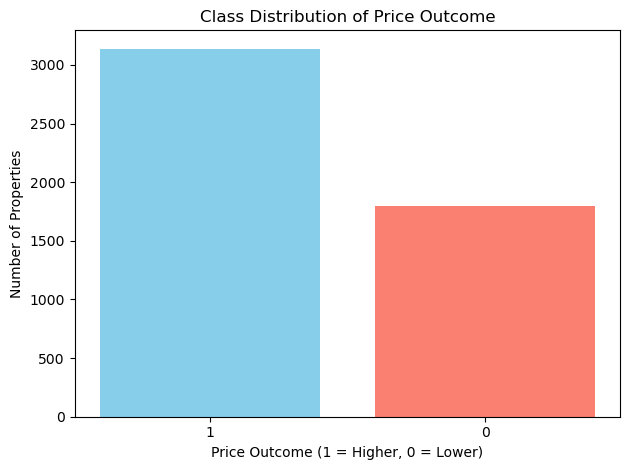

In [10]:
# Show class counts and proportions
class_counts = df2['price_outcome'].value_counts()
class_percent = df2['price_outcome'].value_counts(normalize=True) * 100
print("(rows, columns): ", df2.shape)
print("Class counts:\n", class_counts)
print("Class percentages:\n", class_percent)

# Bar plot for class balance
plt.plot(figsize=(4, 4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Price Outcome (1 = Higher, 0 = Lower)')
plt.ylabel('Number of Properties')
plt.title('Class Distribution of Price Outcome')
plt.tight_layout()
plt.show()


Correlation matrix:
                      listed_price  days_on_market  number_of_beds  \
listed_price             1.000000        0.039847        0.467983   
days_on_market           0.039847        1.000000        0.046661   
number_of_beds           0.467983        0.046661        1.000000   
number_of_baths          0.370427        0.044597        0.659730   
number_of_parks          0.289559        0.036883        0.465921   
property_size            0.139150        0.047834        0.107156   
price_outcome           -0.201116       -0.174823       -0.030318   
suburb_data_missing      0.007771       -0.026660        0.012657   

                     number_of_baths  number_of_parks  property_size  \
listed_price                0.370427         0.289559       0.139150   
days_on_market              0.044597         0.036883       0.047834   
number_of_beds              0.659730         0.465921       0.107156   
number_of_baths             1.000000         0.323168       0.026194 

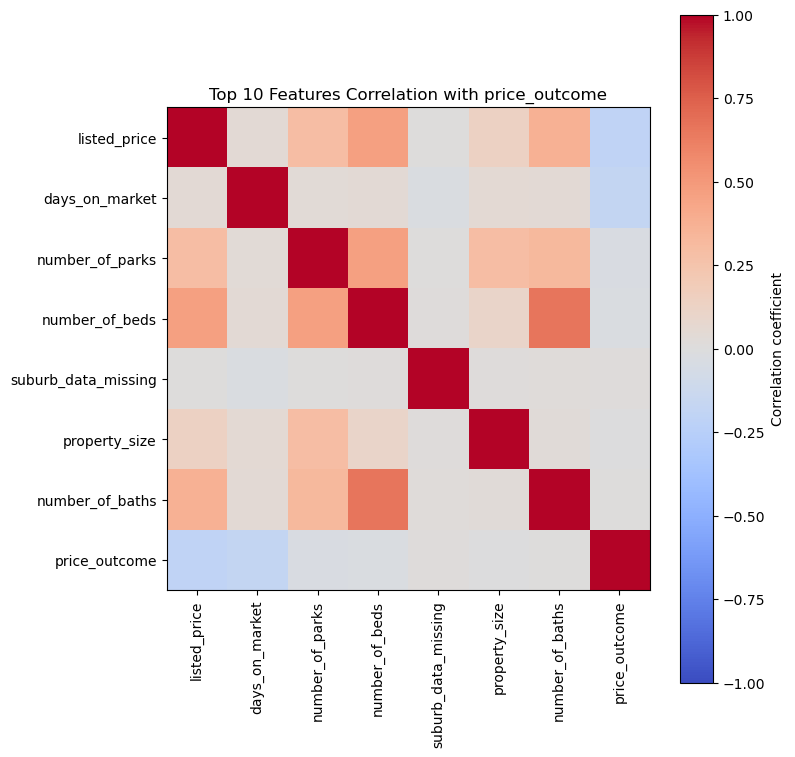

In [11]:
# Compute correlation matrix for all numerical columns (including price_outcome)
corr_matrix = df2.corr(numeric_only=True)
print("Correlation matrix:\n", corr_matrix)

# Get top 10 features most correlated with the target (excluding the target itself)
corr_target = corr_matrix['price_outcome'].abs().sort_values(ascending=False)
top_features = corr_target[1:11].index  # [1:11] skips the target itself

# Subset correlation matrix to top features + target
corr_subset = df2[top_features.tolist() + ['price_outcome']].corr()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.imshow(corr_subset, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr_subset.columns)), corr_subset.columns, rotation=90)
plt.yticks(range(len(corr_subset.index)), corr_subset.index)
plt.title('Top 10 Features Correlation with price_outcome')
plt.tight_layout()
plt.show()


1.3 Text Preparation & Feature Generation


In [12]:
df3 = df2.copy()

# Count unique values in each column
unique_counts = df3.nunique()
print(unique_counts)


property_address               3886
property_suburb                 231
property_state                    1
listing_description            3885
listed_date                     411
listed_price                    465
days_on_market                  238
number_of_beds                   12
number_of_baths                  11
number_of_parks                  14
property_size                   872
property_classification           3
property_sub_classification      14
price_outcome                     2
suburb_data_missing               2
dtype: int64


In [13]:
# Drop property state as it gives no additional information
df3 = df3.drop(columns=["property_state"])
# Drop property_address column as it contains unique identifiers with no predictive values
df3 = df3.drop(columns=['property_address'])

In [14]:
# Frequency encode suburb  
suburb_counts = df3['property_suburb'].value_counts().to_dict()  
df3['property_suburb'] = df3['property_suburb'].map(suburb_counts)  

# One-hot encode other categoricals  
df4 = pd.get_dummies(  
    df3,  
    columns=['property_classification', 'property_sub_classification'],  
    prefix=['prop_type', 'sub_type']  
)  


In [15]:
# Word-based tokenization with unigram
import nltk #Natural Language Tokenization
from nltk.tokenize import word_tokenize

nltk.download("punkt_tab")

text1 = df4["listing_description"].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Bjorn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
# Lowercasing
text2 = text1.apply(lambda token_list: [word.lower() for word in token_list])

In [17]:
# Stopwords removal
nltk.download("stopwords")
from nltk.corpus import stopwords
My_stop_words = stopwords.words("English")

# Custom real estate stopwords
real_estate_stopwords = ['property', 'house', 'home', 'address', 
                        'suburb', 'state', 'click', 'contact', 
                        'agent', 'listing', 'price']

My_stop_words.extend(real_estate_stopwords)

# Keep words not in token list
text3 = text2.apply(lambda x: [word for word in x if word not in My_stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bjorn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Removing punctuation and special characters
import re
# Removes tokens that are not letters, digits or whitespace
text4 = text3.apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens])

In [19]:
#Lemmatization over stemming due to being slower but smarter (from Lecture 7)
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

# Assumes every word is a noun
My_lemmatizer = WordNetLemmatizer()

text5L = text4.apply(lambda x: [My_lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bjorn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
# Represent text in ML format
text6 = [' '.join(i) for i in text5L]

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
My_Count_Vectorizer = CountVectorizer(max_features=1000)

# Bag of Words labels how many times a word is present in that document for all possible words
My_BoW = My_Count_Vectorizer.fit_transform(text6)

In [22]:
#TF-IDF Representation (gives a value to each token in each document based on relative frequency)
# TF = Term frequency, IDF = Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfTransformer
My_TFIDF = TfidfTransformer()

My_TFIDF_Representation = My_TFIDF.fit_transform(My_BoW)
My_TFIDF_Representation

<4937x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 507278 stored elements in Compressed Sparse Row format>

In [23]:
#SVD - Singular Value Decomposition - Reduce the dimensions of space
from sklearn.decomposition import TruncatedSVD
My_SVD = TruncatedSVD(n_components=5)
My_SVD_Dimensions = My_SVD.fit_transform(My_TFIDF_Representation)

My_SVD_Dimensions

array([[ 0.21886376,  0.11512838, -0.0363957 ,  0.02144557,  0.02279372],
       [ 0.3689266 , -0.1501506 ,  0.43848356, -0.05310928,  0.12721255],
       [ 0.47529464, -0.13290456, -0.00507865,  0.02194681,  0.00596829],
       ...,
       [ 0.35725877,  0.14959186, -0.07114453, -0.02439911, -0.05868964],
       [ 0.19796483,  0.06380109,  0.00775547, -0.01971088, -0.17555332],
       [ 0.42164967,  0.16375993, -0.08491207,  0.05981489,  0.01379392]])

In [24]:
df4[["SVD1", "SVD2", "SVD3", "SVD4", "SVD5"]] = My_SVD_Dimensions

In [25]:
# Sentiment analyis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
My_SA = SentimentIntensityAnalyzer()

sentimental_text_list = []
for sentence in df3['listing_description']:
    text_score = My_SA.polarity_scores(sentence)['compound']
    sentimental_text_list.append(text_score)   
df4['sentiment_score'] = sentimental_text_list

# Correlation between sentiment score and price
df4.groupby('price_outcome')['sentiment_score'].mean()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Bjorn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


price_outcome
0    0.949485
1    0.953816
Name: sentiment_score, dtype: float64

The following generated features are not learned in lectures


In [26]:
# New methods to handle date
# Find days since 1st of January 2022, 1 month prior to the start of dataset
start_date = pd.Timestamp('2022-01-01')
df4['days_since_2022'] = (df4['listed_date'] - start_date).dt.days

# Function to get Australian season
def get_season(month):
    # Summer: 12,1,2 | Autumn: 3,4,5 | Winter: 6,7,8 | Spring: 9,10,11
    if month in [12, 1, 2]:
        return 'summer'
    elif month in [3, 4, 5]:
        return 'autumn'
    elif month in [6, 7, 8]:
        return 'winter'
    else:
        return 'spring'

df4['season'] = df4['listed_date'].dt.month.apply(get_season)

# Create new columns to use in models
df4 = pd.get_dummies(df4, columns=['season'])

# Cyclical encoding of months
df4['month'] = df4['listed_date'].dt.month
df4['month_sin'] = np.sin(2 * np.pi * df4['month'] / 12)
df4['month_cos'] = np.cos(2 * np.pi * df4['month'] / 12)

# Drop listed_date because new and better features are generated from it, and its format is not compatible with the ML models
df4 = df4.drop(columns=['listed_date'])


In [27]:
# New method to see if word count affects pricing
df4['desc_word_count'] = df4['listing_description'].apply(lambda x: len(x.split()))

In [28]:
# New method to see if certain keywords affect pricing
keywords = [
    'renovated', 'pool', 'modern', 'spacious', 
    'luxury', 'secure', 'park', 'view', 'ensuite',]

for kw in keywords:
    df4[f'has_{kw}'] = df4['listing_description'].str.contains(
        kw, case=False).astype(int)

# Check keyword prevalence
print(df4[[f'has_{kw}' for kw in keywords]].mean())


has_renovated    0.132064
has_pool         0.296536
has_modern       0.385254
has_spacious     0.447640
has_luxury       0.070691
has_secure       0.269394
has_park         0.596921
has_view         0.308689
has_ensuite      0.363784
dtype: float64


In [29]:
# New method to find emotional intensity rather than just sentiment score
#pip install textblob
from textblob import TextBlob

# Emotional intensity (0-1 scale)
df4['emotional_intensity'] = df4['listing_description'].apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)


In [30]:
# New method: check if readability affects price outcome
# pip install textstat
import textstat

df4['readability_score'] = df4['listing_description'].apply(
    lambda x: textstat.flesch_reading_ease(x)
)

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4937 entries, 0 to 5004
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   property_suburb                   4937 non-null   int64  
 1   listing_description               4937 non-null   object 
 2   listed_price                      4937 non-null   int64  
 3   days_on_market                    4937 non-null   int64  
 4   number_of_beds                    4937 non-null   int64  
 5   number_of_baths                   4937 non-null   float64
 6   number_of_parks                   4937 non-null   float64
 7   property_size                     4937 non-null   float64
 8   price_outcome                     4937 non-null   int64  
 9   suburb_data_missing               4937 non-null   int32  
 10  prop_type_House                   4937 non-null   bool   
 11  prop_type_Land                    4937 non-null   bool   
 12  prop_type_U

1.4 Prepare X and y


In [32]:
# Prepare X and Y for models
# X is all features except for target (price_outcome) and listing_description which is already transformed to other features
X = df4.drop(columns=["price_outcome", "listing_description"])
y = df4["price_outcome"]

# X1 - Removes features created from external research
X1 = X.drop(columns=["days_since_2022", "season_autumn","season_spring","season_summer","season_winter",
                     "month","month_sin", "month_cos", "desc_word_count", "emotional_intensity", "readability_score",
                     "has_renovated", "has_pool", "has_modern", "has_spacious", "has_luxury", "has_secure", "has_park", "has_view", "has_ensuite"])

# Choose random state
seed = 30

X.head()

,property_suburb,listed_price,days_on_market,number_of_beds,number_of_baths,number_of_parks,property_size,suburb_data_missing,prop_type_House,prop_type_Land,...,has_pool,has_modern,has_spacious,has_luxury,has_secure,has_park,has_view,has_ensuite,emotional_intensity,readability_score
0,70,475000,6,2,2.0,1.0,600.0,1,False,False,...,0,0,0,0,0,1,0,0,0.436272,70.599712
1,35,899000,47,4,2.0,2.0,740.0,1,True,False,...,0,1,0,0,0,1,0,1,0.500076,-4.330612
2,50,579000,25,4,2.0,2.0,398.0,1,True,False,...,0,1,0,0,0,1,0,1,0.522269,54.273122
3,11,800000,36,4,2.0,1.0,607.0,1,True,False,...,0,1,1,0,0,1,0,1,0.527019,37.759430
4,35,889000,20,3,1.0,1.0,607.0,0,True,False,...,1,0,0,0,1,0,0,0,0.517366,46.783333


Part 2: Model Building and Evaluation


In this part I will be using the three different machine learning models on the prepared data. The models are decision tree, random forest and support vector machine. First, I will use a simple Decision Tree as a baseline model. Then I will test different parameters for all three models to get as good scores as possible with focus on the balanced F1-score. For random forest, I will two different model inputs, X and X1. X is all the prepared data, while X1 is data prepared only based on what we have learned in the lectures. This is meant to illustrate how additional preparation methods can improve model performance.


In [33]:
# Necessary imports
from sklearn.model_selection import cross_validate

2.0 Baseline Model (Simple Decision Tree)


In [34]:
from sklearn.tree import DecisionTreeClassifier

# No model parameters chosen apart from random_state, uses default parameters
My_BaselineDecisionTree = DecisionTreeClassifier (max_depth=4, random_state = seed)

# Step 3: Already defined X and y

# Step 4 & 5: Fit the model to your data by calling the fit()
My_BaselineDecisionTree.fit(X,y)
Baseline_scores = cross_validate(My_BaselineDecisionTree, X, y, cv=5, scoring=['accuracy', 'recall', 'precision', 'f1', 'roc_auc'])

#Convert to DataFrame & show mean values
print("Decision Tree scores:")
pd.DataFrame(Baseline_scores).mean()

Decision Tree scores:


fit_time          0.038277
score_time        0.015411
test_accuracy     0.669233
test_recall       0.869336
test_precision    0.692752
test_f1           0.769405
test_roc_auc      0.676264
dtype: float64

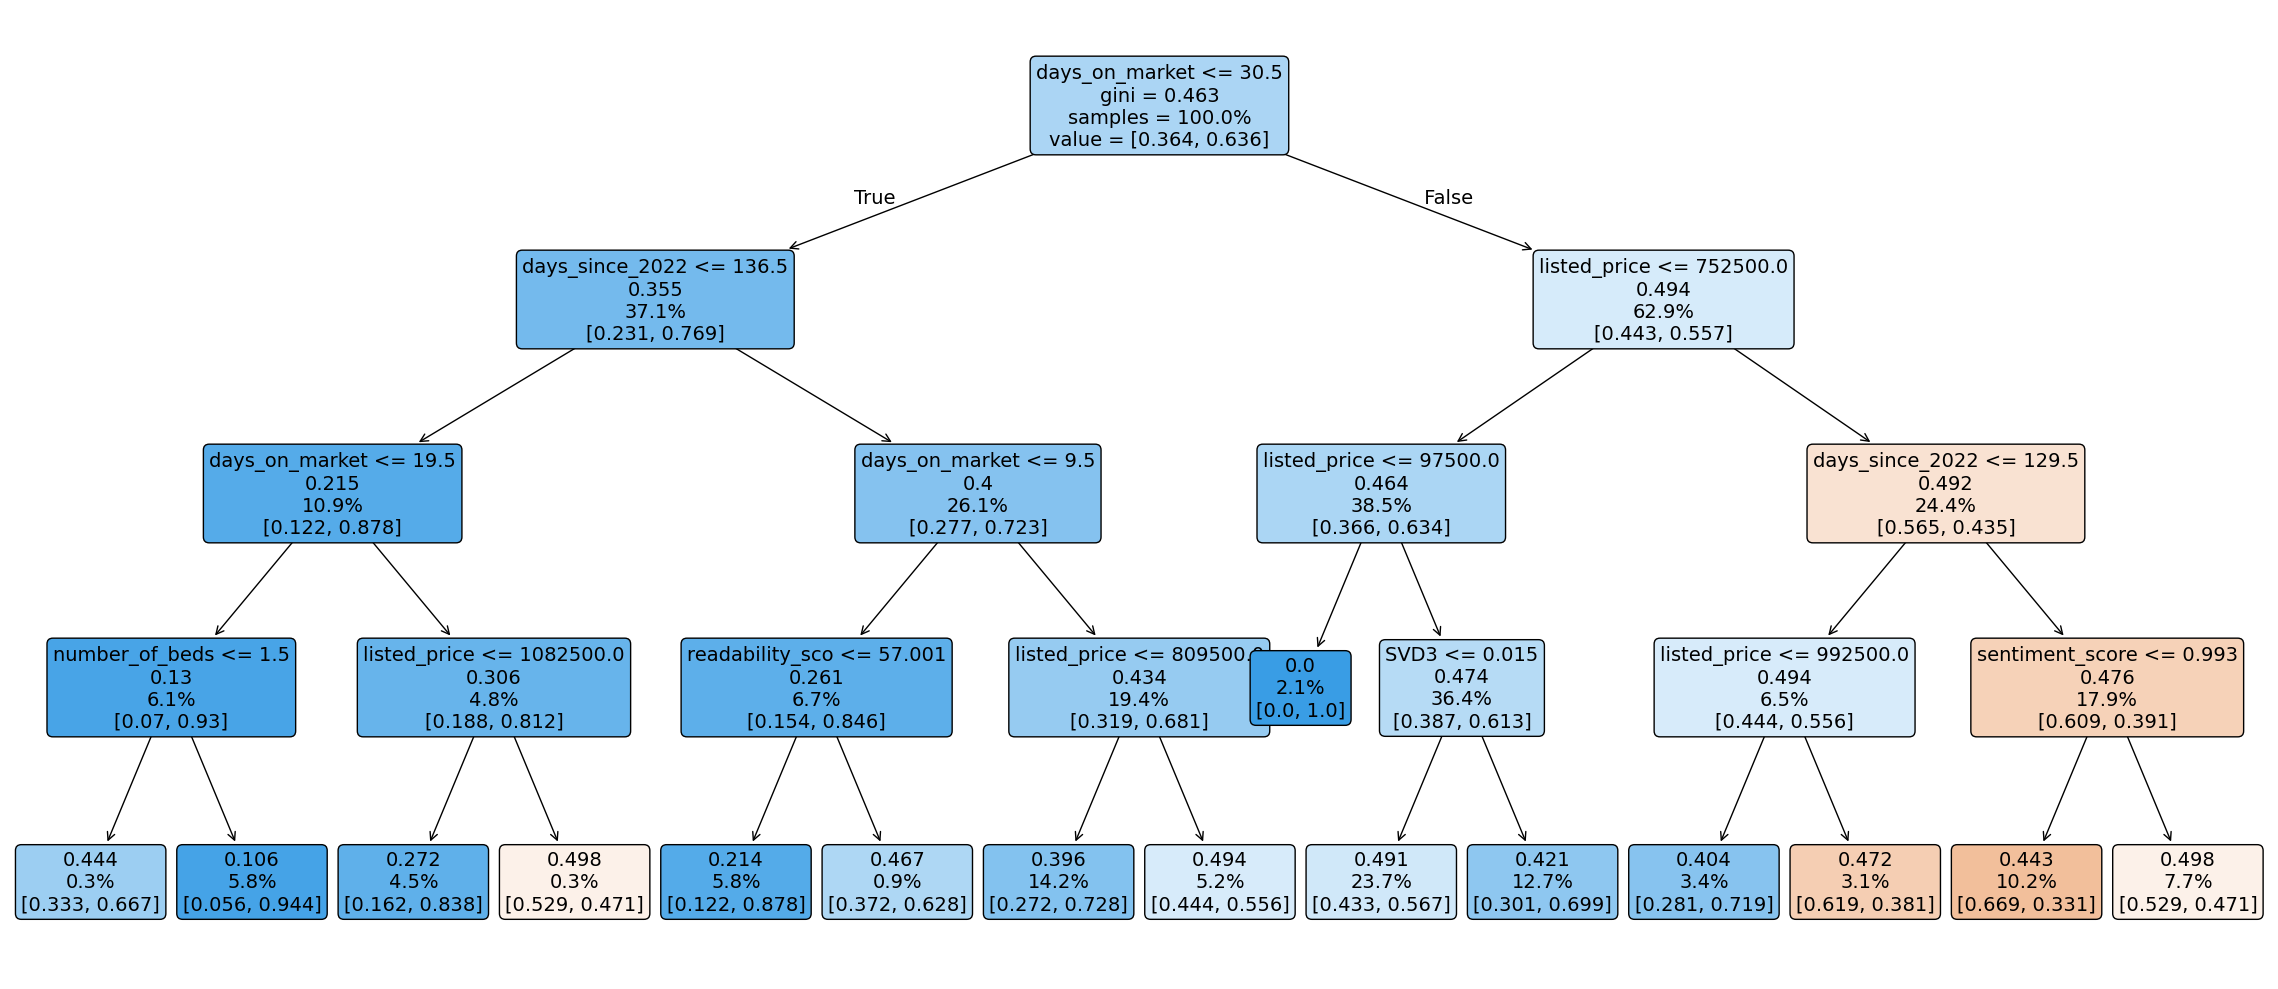

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(23,10))
plot_tree(
    My_BaselineDecisionTree,
    filled=True,
    rounded=True,
    proportion=True,
    impurity=True,
    feature_names=[fn[:15] for fn in X.columns],  # truncate long names
    fontsize=14,
    node_ids=False,
    label='root'
)
plt.tight_layout()
plt.show()


2.1 Decision Tree


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

My_DT_params = {'max_depth': [4, 8, 12, 16], 'min_samples_split': [2, 5, 10]}
My_DT_grid = GridSearchCV(DecisionTreeClassifier(random_state = seed),
                       My_DT_params, cv=5, scoring='f1', n_jobs=-1)
My_DT_grid.fit(X, y)
best_dt = My_DT_grid.best_estimator_

# Get scores for Decision Tree
DT_scores = cross_validate(best_dt, X, y, cv=5,
                          scoring=["accuracy","recall", "precision", "f1", 'roc_auc'], return_train_score=False)

# Print DT scores
print(f"Best params: {My_DT_grid.best_params_}")
print("\nDecision Tree Scores:")
print(pd.DataFrame(DT_scores).mean().round(3))

Best params: {'max_depth': 16, 'min_samples_split': 2}

Decision Tree Scores:
fit_time          0.088
score_time        0.017
test_accuracy     0.736
test_recall       0.800
test_precision    0.789
test_f1           0.794
test_roc_auc      0.724
dtype: float64


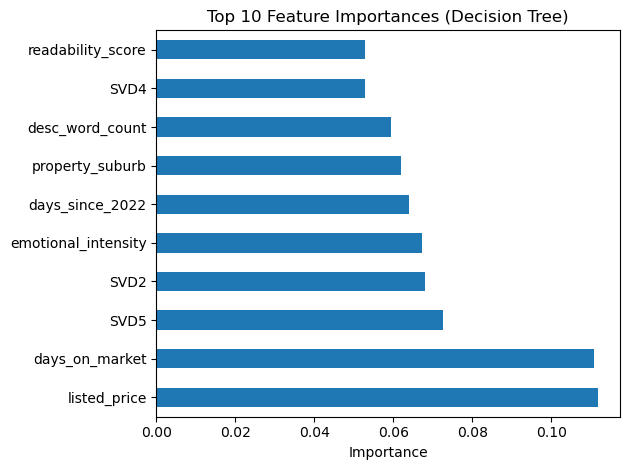

In [37]:
# Feature importance for Decision Tree
dt_importances = pd.Series(best_dt.feature_importances_, index=X.columns)
dt_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


2.2.1 Random Forest


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [4, 8, 12],
             'min_samples_split': [2, 5]}
My_RF_grid = GridSearchCV(RandomForestClassifier(random_state = seed),
                       rf_params, cv=5, scoring='f1', n_jobs=-1)
My_RF_grid.fit(X, y)
best_rf = My_RF_grid.best_estimator_

# Get scores for Random Forest
RF_scores = cross_validate(best_rf, X, y, cv=5,
                          scoring=["accuracy","recall", "precision", "f1", 'roc_auc'], return_train_score=False)

# Print RF scores
print(f"Best params: {My_RF_grid.best_params_}")
print("\nRandom Forest Scores:")
print(pd.DataFrame(RF_scores).mean().round(3))


Best params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Scores:
fit_time          1.630
score_time        0.078
test_accuracy     0.781
test_recall       0.925
test_precision    0.774
test_f1           0.843
test_roc_auc      0.845
dtype: float64


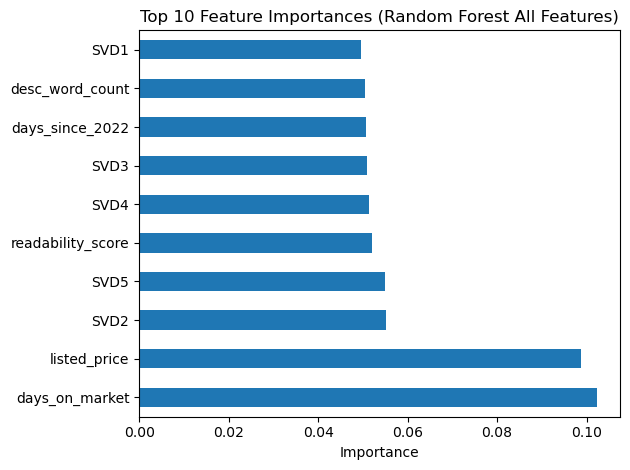

In [39]:
# Feature importance for Random Forest
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
rf_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest All Features)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

2.2.2 Random Forest using only data preparation learned in lectures (using X1 instead of X)


In [40]:
from sklearn.ensemble import RandomForestClassifier

rf2_params = {'n_estimators': [50, 100, 200],
             'max_depth': [4, 8, 12],
             'min_samples_split': [2, 5]}
My_RF2_grid = GridSearchCV(RandomForestClassifier(random_state = seed),
                       rf2_params, cv=5, scoring='f1', n_jobs=-1)
My_RF2_grid.fit(X1, y)
best_rf2 = My_RF2_grid.best_estimator_

# Get scores for Random Forest
RF2_scores = cross_validate(best_rf2, X1, y, cv=5,
                          scoring=["accuracy","recall", "precision", "f1", 'roc_auc'], return_train_score=False)

# Print RF scores
print(f"Best params: {My_RF2_grid.best_params_}")
print("\nRandom Forest Scores:")
print(pd.DataFrame(RF2_scores).mean().round(3))

Best params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 200}

Random Forest Scores:
fit_time          1.556
score_time        0.094
test_accuracy     0.760
test_recall       0.923
test_precision    0.754
test_f1           0.830
test_roc_auc      0.818
dtype: float64


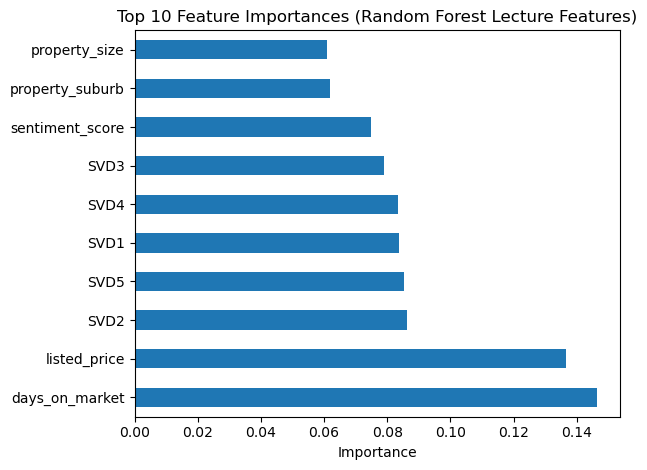

In [41]:
# Feature importance for Random Forest using only methods from lectures
rf2_importances = pd.Series(best_rf2.feature_importances_, index=X1.columns)
rf2_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest Lecture Features)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

2.3 SVM


In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create pipeline to avoid data leakage from standardscaler
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True, random_state = seed))

# Define parameter grid – must reference step name in pipeline (svc__)
# Also tried linear and poly kernels, but for the sake of runtime I only kept rbf as it was best
svm_params = {
    'svc__C': [0.1, 1, 10],        
    'svc__kernel': ['rbf']
}

# Grid search over the pipeline with cross-validation and F1 as the main metric
My_SVM_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='f1', n_jobs=-1)
My_SVM_grid.fit(X, y)

# Get the best model from GridSearchCV
best_svm = My_SVM_grid.best_estimator_

# Get scores for SVM
SVM_scores = cross_validate(best_svm, X, y, cv=5,
                            scoring=["accuracy", "recall", "precision", "f1", "roc_auc"], return_train_score=False)

# Print SVM scores
print(f"Best params: {My_SVM_grid.best_params_}")
print("\nSVM Scores:")
print(pd.DataFrame(SVM_scores).mean().round(3))


Best params: {'svc__C': 1, 'svc__kernel': 'rbf'}

SVM Scores:
fit_time          4.713
score_time        0.851
test_accuracy     0.702
test_recall       0.887
test_precision    0.714
test_f1           0.791
test_roc_auc      0.743
dtype: float64


Part 3: Findings and Conclusion

This part aims to summarize the model performances for easy comparison across the models. It will start by comparing the three different machine learning models, and then use random forest to compare the performance of the prepared data with all the features to the prepared data with only features we have learned to make in lectures.


3.1 Comparing Decision Tree, Random Forest and Support Vector Machine


In [43]:
results = {
    "Baseline Model": pd.DataFrame(Baseline_scores).mean(),
    "Decision Tree": pd.DataFrame(DT_scores).mean(),
    "Random Forest": pd.DataFrame(RF_scores).mean(),
    "SVM": pd.DataFrame(SVM_scores).mean()
}
results_df = pd.DataFrame(results)
print(results_df.round(3))

                Baseline Model  Decision Tree  Random Forest    SVM
fit_time                 0.038          0.088          1.630  4.713
score_time               0.015          0.017          0.078  0.851
test_accuracy            0.669          0.736          0.781  0.702
test_recall              0.869          0.800          0.925  0.887
test_precision           0.693          0.789          0.774  0.714
test_f1                  0.769          0.794          0.843  0.791
test_roc_auc             0.676          0.724          0.845  0.743


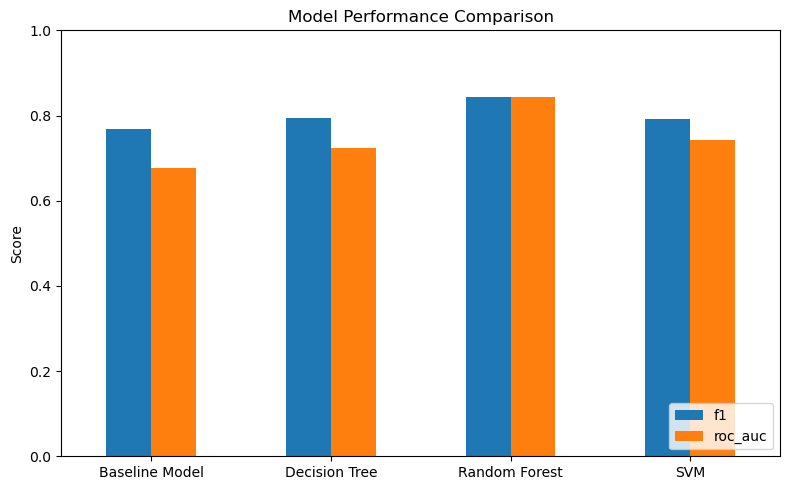

In [44]:
# Transpose and clean up DataFrame
results_df = results_df.T
results_df = results_df[['test_accuracy', 'test_recall', 'test_precision', 'test_f1', 'test_roc_auc']]
results_df.columns = ["accuracy","recall", "precision", "f1", 'roc_auc']

# Bar plot for f1 and roc-auc
results_df[['f1', 'roc_auc']].plot(kind='bar', figsize=(8,5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


3.2 Comparing two initations of Random Forest using X and X1


In [45]:
# Gather data from both RF-models
RF_mean  = pd.DataFrame(RF_scores).mean()
RF2_mean = pd.DataFrame(RF2_scores).mean()

# Choose the test metrics and make comparison
score_metrics = ['test_accuracy','test_recall','test_precision','test_f1','test_roc_auc']
RF_mean  = RF_mean[score_metrics]
RF2_mean = RF2_mean[score_metrics]

comparison_df = pd.DataFrame({
    'All Features':            RF_mean,
    'Lecture Features':        RF2_mean
})

# Compute absolute improvement as a new column
comparison_df['Δ (abs.)'] = (
    comparison_df['All Features'] - comparison_df['Lecture Features']
)

# Compute percentage improvement
comparison_df['Δ (%)'] = (
    comparison_df['Δ (abs.)'] / comparison_df['Lecture Features']
) * 100

# Clean up the index names (drop the 'test_' prefix)
comparison_df.index = (
    comparison_df.index
      .str.replace('test_', '')
      .str.capitalize()
      .str.replace('F1', 'F1 Score')
      .str.replace('Roc_auc','ROC AUC')
)

# Print the table
print("\nModel Performance Comparison:")
print(comparison_df.round(3))



Model Performance Comparison:
           All Features  Lecture Features  Δ (abs.)  Δ (%)
Accuracy          0.781             0.760     0.021  2.772
Recall            0.925             0.923     0.002  0.241
Precision         0.774             0.754     0.020  2.659
F1 Score          0.843             0.830     0.013  1.555
ROC AUC           0.845             0.818     0.027  3.259


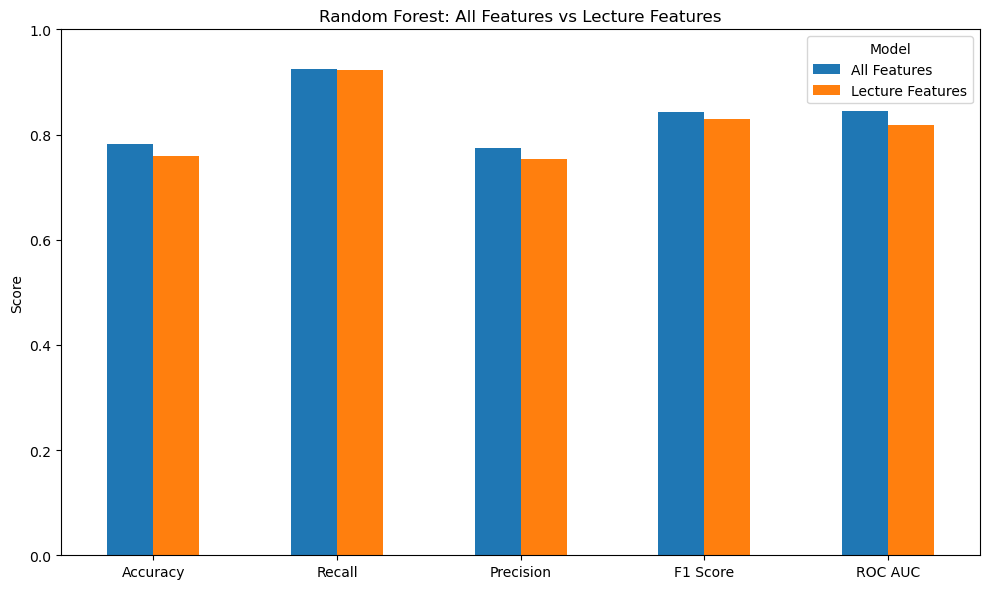

In [46]:
# Plot just the two RF variants
comparison_df[['All Features','Lecture Features']].plot(
    kind='bar', figsize=(10, 6)
)
plt.title('Random Forest: All Features vs Lecture Features')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()